# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Nur-Alhuda Ali

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [126]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X, y = load_concrete()

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [127]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_validate

## STEP 3
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)   # use default test size

DT_model = DecisionTreeRegressor(max_depth=5, random_state=0)
RF_model = RandomForestRegressor(max_depth=5, random_state=0)  # max_features left as default, which is max_features="auto", and "auto" means max_features = n_features, which is what we want for regression
GB_model = GradientBoostingRegressor(max_depth=5, random_state=0) # n_estimators and learning_rate left as default

DT_model.fit(X_train, y_train)
RF_model.fit(X_train, y_train)
GB_model.fit(X_train, y_train)

## STEP 4

# For the Decision Tree model:
DT_cv = cross_validate(DT_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
DT_train_score = np.mean(DT_cv['train_score']) * -1
DT_test_score = np.mean(DT_cv['test_score']) * -1
scores_MSE = { 'DT' : [DT_train_score, DT_test_score] } # add results to dictionary of negative MSE scores

# For the Random Forest model:
RF_cv = cross_validate(RF_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
RF_train_score = np.mean(RF_cv['train_score']) * -1
RF_test_score = np.mean(RF_cv['test_score']) * -1
scores_MSE['RF'] = [RF_train_score, RF_test_score]

# For the Gradient Boosting model:
GB_cv = cross_validate(GB_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
GB_train_score = np.mean(GB_cv['train_score']) * -1
GB_test_score = np.mean(GB_cv['test_score']) * -1
scores_MSE['GB'] = [GB_train_score, GB_test_score]

## STEP 5
# Visualize the results.
print("Using negative mean square error scoring:\n")
results = pd.DataFrame.from_dict(scores_MSE, orient='index', columns=['Training Accuracy', 'Validation Accuracy'])
print(results)

Using negative mean square error scoring:

    Training Accuracy  Validation Accuracy
DT          47.279761            73.447331
RF          29.576135            45.052441
GB           3.379440            22.819636


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [129]:
# TO DO: ADD YOUR CODE HERE

# For the Decision Tree model:
DT_cv = cross_validate(DT_model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
DT_train_score = np.mean(DT_cv['train_score'])
DT_test_score = np.mean(DT_cv['test_score'])
scores_R2 = { 'DT' : [DT_train_score, DT_test_score] } # add results to dictionary of negative MSE scores

# For the Random Forest model:
RF_cv = cross_validate(RF_model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
RF_train_score = np.mean(RF_cv['train_score'])
RF_test_score = np.mean(RF_cv['test_score'])
scores_R2['RF'] = [RF_train_score, RF_test_score]

# For the Gradient Boosting model:
GB_cv = cross_validate(GB_model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
GB_train_score = np.mean(GB_cv['train_score'])
GB_test_score = np.mean(GB_cv['test_score'])
scores_R2['GB'] = [GB_train_score, GB_test_score]

# Visualize the results.
print("Using R2 scoring:\n")
results = pd.DataFrame.from_dict(scores_R2, orient='index', columns=['Training Accuracy', 'Validation Accuracy'])
print(results)

Using R2 scoring:

    Training Accuracy  Validation Accuracy
DT           0.834465             0.738697
RF           0.896561             0.840951
GB           0.988171             0.919348


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
2. Out of the models you tested, which model would you select for this dataset and why?
3. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

1. Using a linear model for this data in the previous assignment, the training and validation accuracies using R2 scoring were 0.61 and 0.62, respectively, and using MSE, were 111. 36 and 95.90, respectively. All the models used in the assignment performed significantly better than the linear model.

    Using mean square error, the decision tree model has training and validation accuracies of 47.28 and 73.45, which are 64.08 and 22.45 lower than those of the linear model, respectively. The random forest model has training and validation mean square errors of 29.58 and 45.05, which are 81.78 and 50.85 lower than those of the linear model, respectively. Again, the gradient-boosting model was the best-performing with training and validation mean square errors of 3.38 and 22.82, which are 107.98 and 73.08, respectively.

    Using R2 scoring, the decision tree model has training and validation accuracies of 0.83 and 0.74, which are 0.22 and 0.12 higher than those of the linear model, respectively. The random forest model has training and validation R2 scores of 0.90 and 0.84, which are 0.29 and 0.22 higher than those of the linear model, respectively. The best-performing model is the gradient boosting regressor. It has training and validation R2 scores of 0.99 and 0.92, which are 0.38 and 0.30 higher than those of the linear model, respectively.

2. Out of the models tested, I would select the gradient boosting model since it is the best-performing. It has the lowest training and validation mean square errors, indicating that it makes the highest quality predictions (has the lowest prediction error) of all the models. As expected, its training and validation R2 scores are also the highest of all the models, and are just generally very high, being very close to 1, indicating that it is the best fit for the data.

3. Both the decistion tree and random forest models did not perform as well as the gradient boosting model.

    For the decision tree model, I would play around with the maximum depth of the tree to see if increasing or descreasing it would increase its accuracy. For all the models, the maximum depth was set to 5. Since pre-pruning is the main strategy used to tune a decision tree model, altering the maximum depth will greatly impact the model's accuracy. Whereas the other models have other parameters that their performance relies on, like number of estimators in random forests or learning rate in gradient boosting machines, the decision tree model only has a few, one of them being maximum depth of the tree.

    To increase the accuracy of the random forest model, I would add more trees, increasing the n_estimators parameter, to better accound for the behaviour of the data and make more accurate predictions.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
\
\
I used the ENSF 611 Jupyter notebooks as a guideline for how to use SciKit-Learn for cross_validate(). Other than that, I relied on the SciKit-Learn documentation (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) to help me understand what the different parameters for cross_validate() were, what values I should put for them, and what the function returns in order to be able to properly extract the training and testing scores from the return value. I completed all the steps in order because every step relies on the one before it. However, after completing all the steps, I did go back to tweak certain parameters to see how that would affect my results in order to better understand what was going on.

I generally don't like to use generative AI to help me code as I prefer to do more manual research and read the documentation for libraries that I am using myself - so I did not use any generative AI for this process.

A challenge I had was determining whether to use the entire dataset or just the training set for cross-validation. After doing my own research, I learned that using the training set for cross-validation is best practice done to ensure that the model does not overfit the data and provides a more accuracte reflection of how it will perform on unseen data - which was eventually confirmed by our instructor.


## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [130]:
# TO DO: Import wine dataset

wine_df = pd.read_csv('wine.data', names=['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                                          'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'], index_col=False)

# The dataset has 14 columns. The first column is for the wine class, which is the target variable that we want to classify wine samples into.
# The feature matrix X will contain all columns other than 'Class'. Class will be made the target vector y.
X = wine_df.drop(columns='Class')
y = wine_df['Class']

# Print size and type of X and y.
print("Size of X: ", X.shape, "\nType(s) of X:\n", X.dtypes)
print("\nSize of y: ", y.shape, "\nType of y:", y.dtypes)

Size of X:  (178, 13) 
Type(s) of X:
 Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

Size of y:  (178,) 
Type of y: int64


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [133]:
# TO DO: ADD YOUR CODE HERE

display(wine_df.head(5))

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [134]:
# TO DO: ADD YOUR CODE HERE

display(wine_df.isnull().sum()) # There are no missing values.

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

How many samples do we have of each type of wine?

In [135]:
# TO DO: ADD YOUR CODE HERE

mask = wine_df['Class'] == 1
num_class1_samples = len(wine_df[mask])

mask = wine_df['Class'] == 2
num_class2_samples = len(wine_df[mask])

mask = wine_df['Class'] == 3
num_class3_samples = len(wine_df[mask])

print("Number of Samples of Each Type of Wine")
print("Class 1: ", num_class1_samples)
print("Class 2: ", num_class2_samples)
print("Class 3: ", num_class3_samples)

Number of Samples of Each Type of Wine
Class 1:  59
Class 2:  71
Class 3:  48


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [140]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## STEP 3
dtc_model = DecisionTreeClassifier(max_depth=3, random_state=0)
svc_model = SVC(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # use default test size

dtc_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

## STEP 4

# For the Decision Tree Classifier
dtc_cv = cross_validate(dtc_model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
dtc_train_score = np.mean(dtc_cv['train_score'])
dtc_test_score = np.mean(dtc_cv['test_score'])
scores_ACC = { 'DT' : [X.shape, dtc_train_score, dtc_test_score] }

# For the Support Vector Classifier
svc_cv = cross_validate(svc_model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
svc_train_score = np.mean(svc_cv['train_score'])
svc_test_score = np.mean(svc_cv['test_score'])
scores_ACC['SVC'] = [X.shape, svc_train_score, svc_test_score]

## STEP 5
results = pd.DataFrame.from_dict(scores_ACC, orient='index', columns=['Data Size', 'Training Accuracy', 'Validation Accuracy'])
print(results)

     Data Size  Training Accuracy  Validation Accuracy
DT   (178, 13)           0.994357             0.894017
SVC  (178, 13)           0.680427             0.676638


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [141]:
# TO DO: Implement best model
from sklearn.metrics import confusion_matrix

# The method that gave the highest accuracy is the Decisiion Tree Classifier. So this is the model we will use for the confusion matrix.
y_pred = dtc_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


array([[14,  2,  0],
       [ 0, 20,  1],
       [ 0,  0,  8]])

Text(145.22222222222229, 0.5, 'True Value')

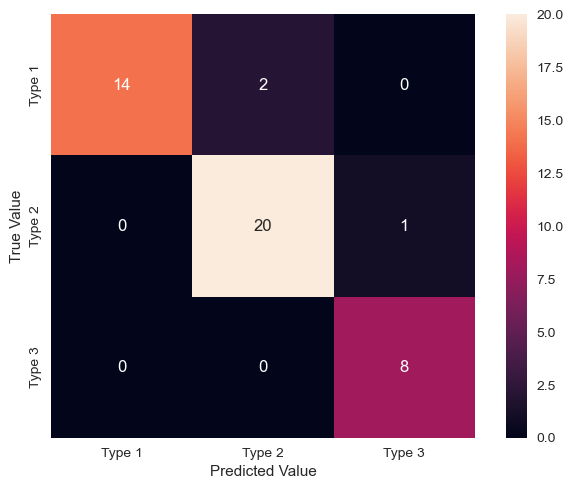

In [142]:
# TO DO: Print confusion matrix using a heatmap
sns.heatmap(conf_matrix, xticklabels=['Type 1', 'Type 2', 'Type 3'], yticklabels=['Type 1', 'Type 2', 'Type 3'], square=True, annot=True, cbar=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

In [143]:
# TO DO: Print classification report
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['Type 1', 'Type 2', 'Type 3'])
print(report)

              precision    recall  f1-score   support

      Type 1       1.00      0.88      0.93        16
      Type 2       0.91      0.95      0.93        21
      Type 3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

1. The training and validation accuracies for the decision tree model were 0.99 and 0.89, respectively, whereas for the support vector machines model, they were 0.680 and 0.677, respectively. The decision tree model accuracies were much higher than the SVC model, indicating that the former is a much better fit for the data in their current state. The SVC model has low training and validation accuracies that are both almost the same, which means this model has high bias.

2. One reason the support vector machines model did not work as well as the decision tree model is because it has many parameters that were left as default. For example, important parameters such as the regularization parameter C, the choice of the kernel, and the kernel-specific parameters, like gamma for the Gaussian kernel, were not specified. Tweaking these parameters could drastically improve the SVC model's performance.

    Another reason for the model's bad performance could be because support vector machines require careful preprocessing of the data, like handling class imbalances, removing outliers, etc.

3. Using the high-performing decision tree model, only 3 samples were incorrectly classified. 2 samples were predicted as Type 2, but were actually Type 1 wines. 1 sample was predicted as Type 3, but was actually a Type 2 wine. Of the 45 samples in the test set, all but 3 were predicted correctly (true positives).

4. Whether precision or recall is more imoprtant depends on the application of the model. For example, if Type 1 is the most expensive wine and Type 3 is the least expensive, then from a business owner's perspective, a false negative for the Type 1 wine category would be more costly than a false positive. Misclassifying an expensive wine as a less expensive wine results in more profit loss to the business than classifying a cheap wine as an expensive one. So for the Type 1 category, maximizing recall is more important. On the other hand, for the cheapest, Type 3 wine, a false negative would result in increased profits (although unethical), whereas a false positive for Type 3 would result in losses (more expensive wines classified as the cheapest) - so, in this case, precision is more important.

    In conclusion, in multi-classification, it is important to assess each category/class individually (or at least the most costly ones) for whether maximizing precision or recall is more important. Once this assessment is done, the model can be adjusted to meet the precision or recall goals for each class.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

\
I used the ENSF 611 Jupyter notebooks as a guideline for how to use SciKit-Learn for the confusion matrix and classification report. Other than that, I relied on the SciKit-Learn documentation (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) to help me understand what the parameters of the confusion matrix function do. Just like in the first part of this assignment, I completed all the steps in order because every step relies on the one before it.

A challenge I had was figuring out whether maximizing precision or recall was more important. Since this is a multi-classification problem, it is not as simple to determine which is more important like in the binary case. I did try to use generative AI to help me answer this by asking it "What is more important in a multi-classification problem - precision or recall? What is more costly, false negatives or false positives?" However, it wasn't of much help since the answer it gave me was that because multi-classification problems are complex, it depends on the application. So from there, I started thinking of different scenarios in which this wine classification model might be used and for each scenario, I tried to discern whether precision or recall was more important, which led me to my answer above.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

In *Part 1: Regression*, I found that for complex datasets, such as the concrete one used, that are high-dimensional, involve many features and intricate interactions between them, and have the potential for a lot of noise in the data (often a problem with concrete properties), gradient boosting models perform better than random forest and single decision tree models for a multitude of reasons. When dealing with high-dimensional datasets, gradient boosting models are able to assess which features are the most important to the model and ignores or minimizes other features, reducing overfitting. In addition to being able to better-handle datasets with many features, gradient boosting models are also able to discern the complex relationships between models, all the while, ignoring outliers in the data, due to their iterative nature where each subsequent tree created learns from the errors of the one before it. This is reflected in the results of the first part of this assignment where the gradient boosting model had training and validation R2 scores of 0.99 and 0.92 compared to the lower scores for the decision tree model, 0.83 and 0.74, and the random forest model, 0.90 and 0.84, respectively.

However, when comparing these 3 non-linear models to the linear regression model used for the same dataset in the previous assignment, all 3 non-linear models far outperform the linear one, which had training and validation R2 scores of 0.61 and 0.62, respectively. This is likely due to the high number of features in this dataset and the complex interactions between the features that the linear model is unable to capture.

In *Part 2: Classification*, I found that the decision tree model performed much better than the support vector machines model, with training and validation accuracies of 0.99 and 0.89, compared to the SVM's, which were 0.680 and 0.677, respectively. This was likely due to the fact that support vector machines are much more complex, requiring a lot of fine-tuning of parameters and pre-processing to have a well-performing model. This highlights the importance of starting with basic models and assessing their performance for the given dataset before moving to a more complex, tedious model. I also observed that with multi-classification problems, both precision and recall are important because they can mean the same thing and have the same implications from class to class. So for these problems, the goal should be to look at what is important for the specific application of the model and strike a balance between both precision and recall.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*
I disliked how redundant/repetitvie the observations/interpretation part of the assignment was. I felt like I had already interpreted the results and included data to justify my findings in the questions following each coding part of the assignment.

I found it interesting creating the confusion matrix and interpreting it. Seeing an actual visual depiction of the results rather than them being a table and having them broken down in a confusion matrix allowed me to deepen my understanding of the model's performance and what precision and recall mean.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [1]:
# TO DO: ADD YOUR CODE HERE

*ANSWER HERE*